<a href="https://colab.research.google.com/github/Bright-Momo/SimplifiedJournalsGame/blob/main/Simple%20version%20for%20lambda%20and%20epsilon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import itertools
import pandas as pd


In [19]:
# Parameter Configuration
# ----------------------
alpha = 0.5  # Probability of a good paper
r = 1.0      # Reward for accepted paper
costs = [0.01, 0.1, 0.5]  # Rejection costs to explore
epsilons = np.linspace(0, 1, 5)  # Error type I (false accept)
lambdas = np.linspace(0, 1, 5)   # Error type II (false reject)

# Strategy Definitions
# ----------------------
author_strategies = ['Always Submit', 'Only Submit Good', 'Only Submit Bad', 'Never Submit']
journal_strategies = ['Always Accept', 'Only Accept Good', 'Only Accept Bad', 'Reject All']


In [20]:
# Payoff Computation
# ----------------------
def calculate_payoffs(author_strategy, journal_strategy, alpha, r, c, epsilon, lambda_):
    # Author Payoff
    if author_strategy == 3:  # Never Submit
        author_payoff = 0
    elif author_strategy == 0:  # Always Submit
        reward = alpha * (1 - lambda_) * r + (1 - alpha) * epsilon * r
        rejection = alpha * lambda_ + (1 - alpha) * (1 - epsilon)
        author_payoff = reward - c * rejection - 0.05  # Add small penalty for over-submitting
    elif author_strategy == 1:  # Only Submit Good
        reward = alpha * (1 - lambda_) * r
        rejection = alpha * lambda_
        author_payoff = reward - c * rejection
    elif author_strategy == 2:  # Only Submit Bad
        reward = (1 - alpha) * epsilon * r
        rejection = (1 - alpha) * (1 - epsilon)
        author_payoff = reward - c * rejection - 0.1  # Penalty for knowingly submitting bad

    # Journal Payoff
    if journal_strategy == 3:  # Reject All
        journal_payoff = -0.1  # Small penalty for being overly conservative
    elif journal_strategy == 0:  # Always Accept
        quality = alpha * (1 - lambda_) + (1 - alpha) * epsilon
        journal_payoff = quality - 0.05  # Cost of losing credibility by accepting all
    elif journal_strategy == 1:  # Only Accept Good
        journal_payoff = alpha * (1 - lambda_)
    elif journal_strategy == 2:  # Only Accept Bad
        journal_payoff = (1 - alpha) * epsilon - 0.1  # Penalty for intentionally accepting bad

    return author_payoff, journal_payoff

In [21]:
# Nash Equilibrium Check
# ----------------------
def is_nash_eq(a, jn, ap, jp, all_payoffs):
    for alt_a in range(4):
        if alt_a != a and all_payoffs[(alt_a, jn)][0] > ap:
            return False
    for alt_jn in range(4):
        if alt_jn != jn and all_payoffs[(a, alt_jn)][1] > jp:
            return False
    return True

In [22]:
# Simulation & Grid Build
results = {}

for c in costs:
    author_grid = np.zeros((5, 5), dtype=int)
    journal_grid = np.zeros((5, 5), dtype=int)
    for i, lambda_ in enumerate(lambdas):
        for j, epsilon in enumerate(epsilons):
            all_payoffs = {}
            for a in range(4):
                for jn in range(4):
                    all_payoffs[(a, jn)] = calculate_payoffs(a, jn, alpha, r, c, epsilon, lambda_)

            nash_eqs = []
            for a in range(4):
                for jn in range(4):
                    ap, jp = all_payoffs[(a, jn)]
                    if is_nash_eq(a, jn, ap, jp, all_payoffs):
                        nash_eqs.append(((a, jn), ap + jp))

            if nash_eqs:
                best_eq = max(nash_eqs, key=lambda x: x[1])[0]
                author_grid[i, j] = best_eq[0]
                journal_grid[i, j] = best_eq[1]

    results[c] = {'author': author_grid, 'journal': journal_grid}


Strategy Frequency for c = 0.01
Author Strategy Frequencies:
  0: Always Submit -> 80.0%
  1: Only Submit Good -> 16.0%
  2: Only Submit Bad -> 0.0%
  3: Never Submit -> 4.0%
Journal Strategy Frequencies:
  0: Always Accept -> 80.0%
  1: Only Accept Good -> 20.0%
  2: Only Accept Bad -> 0.0%
  3: Reject All -> 0.0%


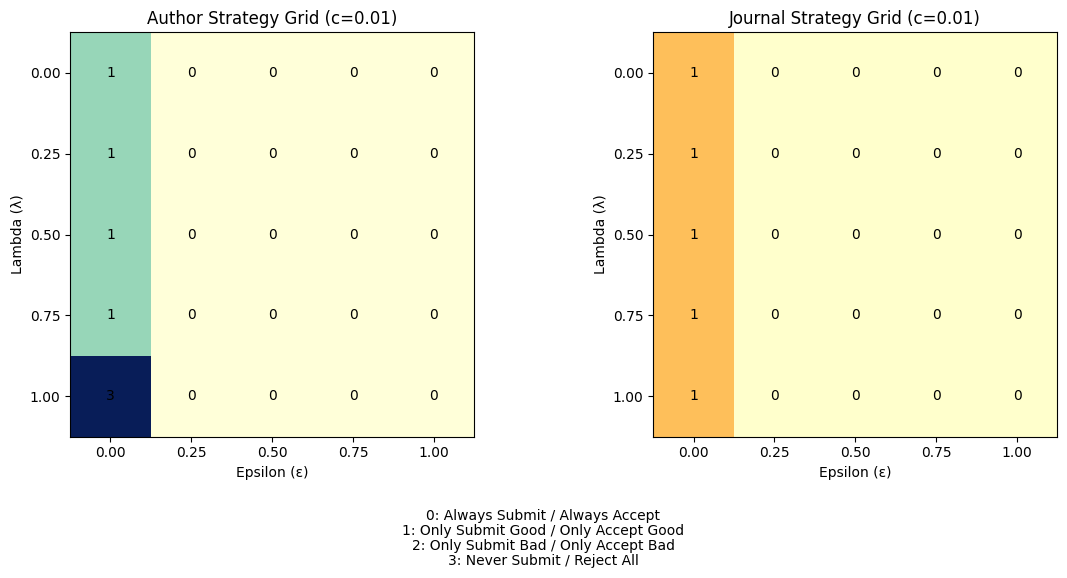


Strategy Frequency for c = 0.1
Author Strategy Frequencies:
  0: Always Submit -> 72.0%
  1: Only Submit Good -> 16.0%
  2: Only Submit Bad -> 4.0%
  3: Never Submit -> 8.0%
Journal Strategy Frequencies:
  0: Always Accept -> 80.0%
  1: Only Accept Good -> 20.0%
  2: Only Accept Bad -> 0.0%
  3: Reject All -> 0.0%


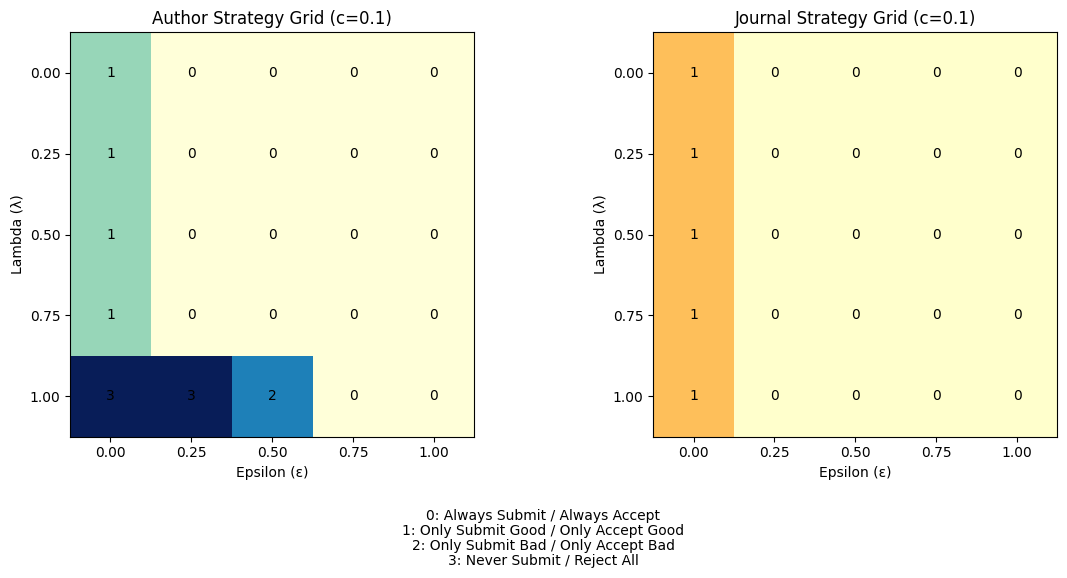


Strategy Frequency for c = 0.5
Author Strategy Frequencies:
  0: Always Submit -> 36.0%
  1: Only Submit Good -> 24.0%
  2: Only Submit Bad -> 24.0%
  3: Never Submit -> 16.0%
Journal Strategy Frequencies:
  0: Always Accept -> 80.0%
  1: Only Accept Good -> 20.0%
  2: Only Accept Bad -> 0.0%
  3: Reject All -> 0.0%


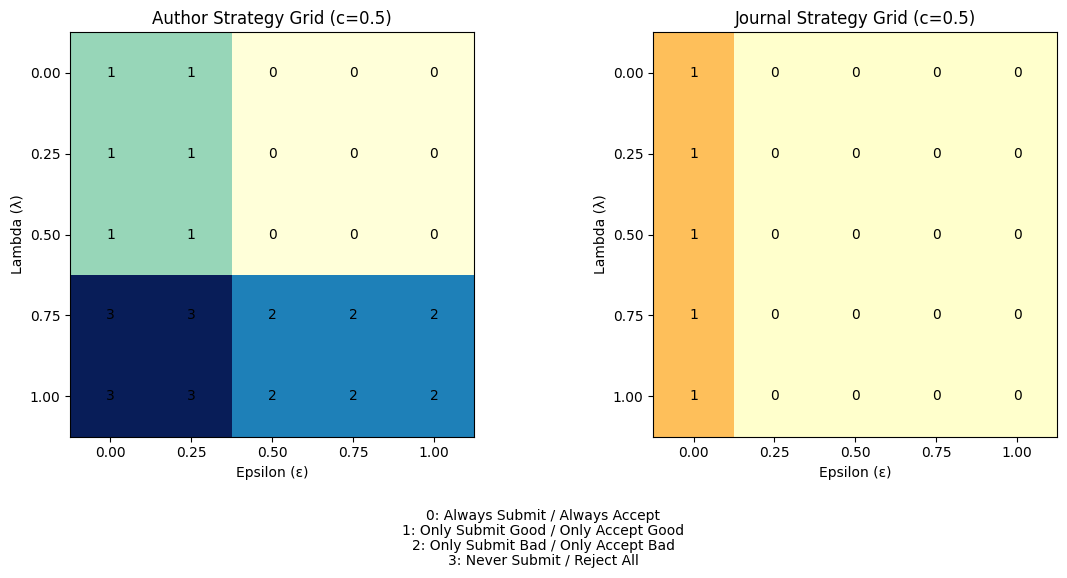

In [24]:
# Visualization & Frequency Display
# ----------------------
for c in costs:
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))
    axes[0].imshow(results[c]['author'], cmap='YlGnBu', vmin=0, vmax=3)
    axes[0].set_title(f'Author Strategy Grid (c={c})')
    axes[0].set_xticks(range(5))
    axes[0].set_yticks(range(5))
    axes[0].set_xticklabels([f"{e:.2f}" for e in epsilons])
    axes[0].set_yticklabels([f"{l:.2f}" for l in lambdas])
    axes[0].set_xlabel('Epsilon (ε)')
    axes[0].set_ylabel('Lambda (λ)')
    for i in range(5):
        for j in range(5):
            axes[0].text(j, i, results[c]['author'][i, j], ha='center', va='center', color='black')

    axes[1].imshow(results[c]['journal'], cmap='YlOrRd', vmin=0, vmax=3)
    axes[1].set_title(f'Journal Strategy Grid (c={c})')
    axes[1].set_xticks(range(5))
    axes[1].set_yticks(range(5))
    axes[1].set_xticklabels([f"{e:.2f}" for e in epsilons])
    axes[1].set_yticklabels([f"{l:.2f}" for l in lambdas])
    axes[1].set_xlabel('Epsilon (ε)')
    axes[1].set_ylabel('Lambda (λ)')
    for i in range(5):
        for j in range(5):
            axes[1].text(j, i, results[c]['journal'][i, j], ha='center', va='center', color='black')
        # Add strategy legends next to plots
    strategy_legend = [
        "0: Always Submit / Always Accept",
        "1: Only Submit Good / Only Accept Good",
        "2: Only Submit Bad / Only Accept Bad",
        "3: Never Submit / Reject All"
    ]

    for idx, label in enumerate(strategy_legend):
        fig.text(0.5, -0.05 - idx * 0.03, label, ha='center', fontsize=10)

    # Display strategy frequency
    author_counts = np.bincount(results[c]['author'].flatten(), minlength=4)
    journal_counts = np.bincount(results[c]['journal'].flatten(), minlength=4)
    total = 25

    print(f"\nStrategy Frequency for c = {c}")
    print("Author Strategy Frequencies:")
    for i, count in enumerate(author_counts):
        print(f"  {i}: {author_strategies[i]} -> {count/total*100:.1f}%")
    print("Journal Strategy Frequencies:")
    for i, count in enumerate(journal_counts):
        print(f"  {i}: {journal_strategies[i]} -> {count/total*100:.1f}%")

    plt.tight_layout()
    plt.show()
